# Importing the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [4]:
os.chdir("F:\CDAC\Mini_Project\Dataset")

# Reading the Dataset

In [5]:
air_passenger = pd.read_csv("train.csv", index_col = 0)
air_passenger

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


# Exploratory Data Analysis (EDA)

In [6]:
# Making a copy of originaal dataset
aps = air_passenger.copy()
aps

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [7]:
# First 5 values
aps.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
# Last 5 values
aps.tail()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [9]:
# Describing the data
aps.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
# Information about the data
aps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     103904 no

In [11]:
# Checking for Duplicate values
aps.duplicated().sum()

0

In [12]:
# Checking the Datatypes of the Data
aps.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [13]:
# Listing all the columns in the data
aps.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [14]:
# Displaying the classes and their counts
aps['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64

In [15]:
#checking the null values
aps.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [16]:
#dropping the null values
aps.dropna(inplace = True)

# Univariate Analysis

### Histograms

In [17]:
# User defined function for Boxplot
def boxplot(dataframe, feature_name):
    sns.boxplot(data = dataframe, y = feature_name)
    plt.show()

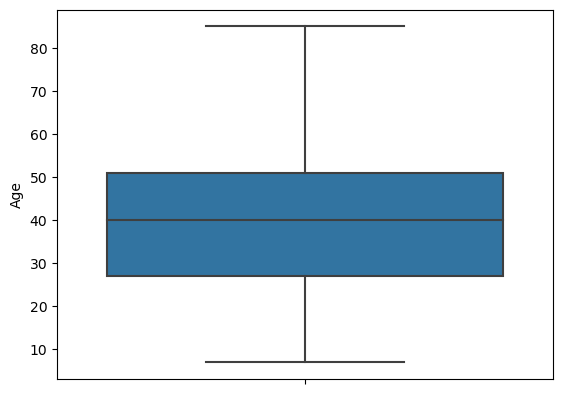

In [18]:
boxplot(aps,'Age')

Observations: Age column does not have Outliers.

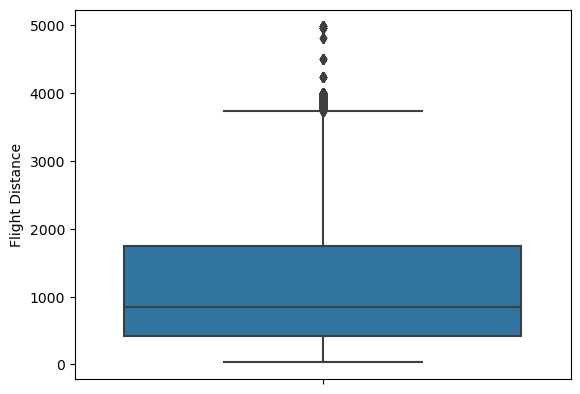

In [19]:
boxplot(aps,'Flight Distance')

Observations: Flight distance has some values that are bigger than most other values. i.e. outliers.

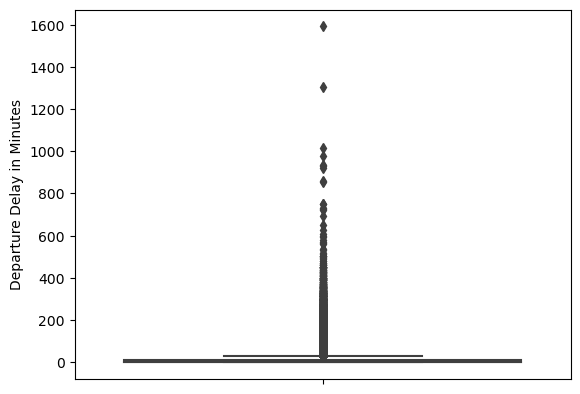

In [20]:
boxplot(aps,'Departure Delay in Minutes')

Obervation: Departure Delay in Minutes has huge number of Outliers, but can't remove them instead we will scale the data as delay is in minutes and will affect the overall satisfaction level of passenger

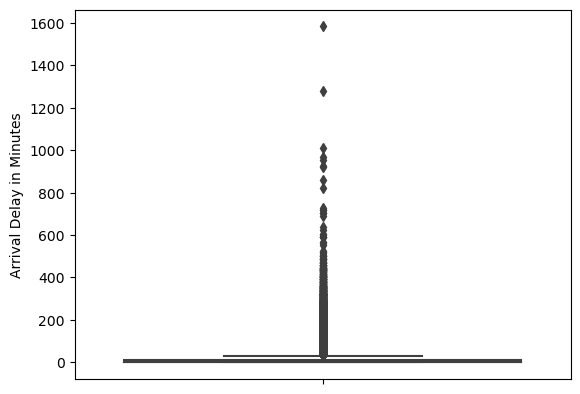

In [21]:
boxplot(aps,'Arrival Delay in Minutes')

Obervation: Arrival Delay in Minutes has hue number of Outliers, but can't remove them instead we will scale the data as arrival is in minutes and will affect the overall satisfaction level of passenger

### Histograms

In [22]:
def histplot(feature_name, figure_color, row, column):
    # aps is the name of current dataframe
    sns.histplot(aps, x = feature_name, color = figure_color, ax = axes[row][column])

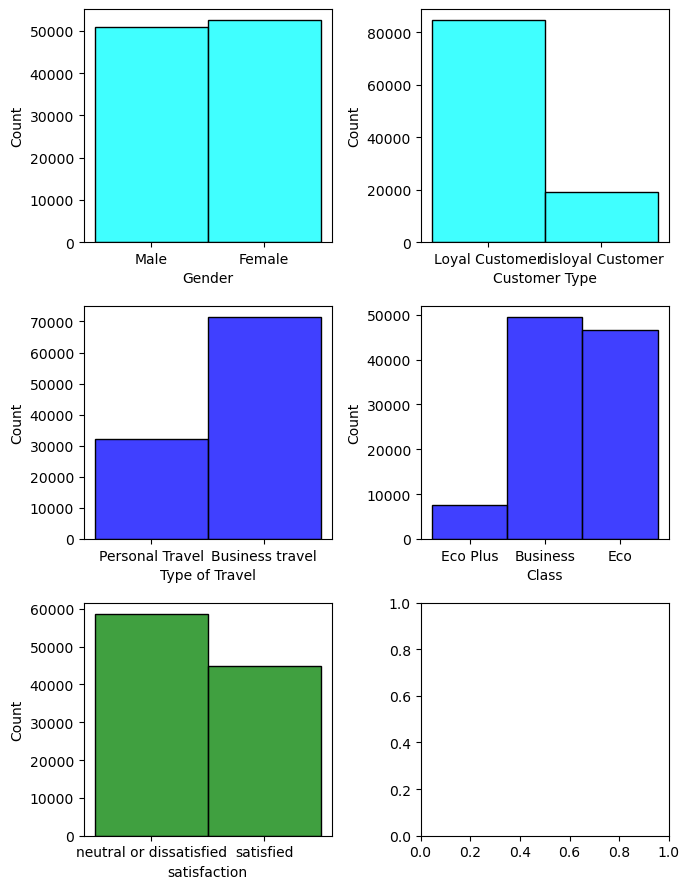

In [23]:
plt.rcParams['figure.figsize'] = [7,9]
plt.rcParams['figure.autolayout'] = True
# f is overall reference to the figure and axes states how many subplots to plot (rows,columns)
f, axes = plt.subplots(3,2)
histplot("Gender", 'cyan', 0, 0,)
histplot("Customer Type", 'cyan', 0, 1)
histplot("Type of Travel", 'blue', 1, 0)
histplot("Class", 'blue', 1, 1)
histplot("satisfaction",'green', 2, 0)

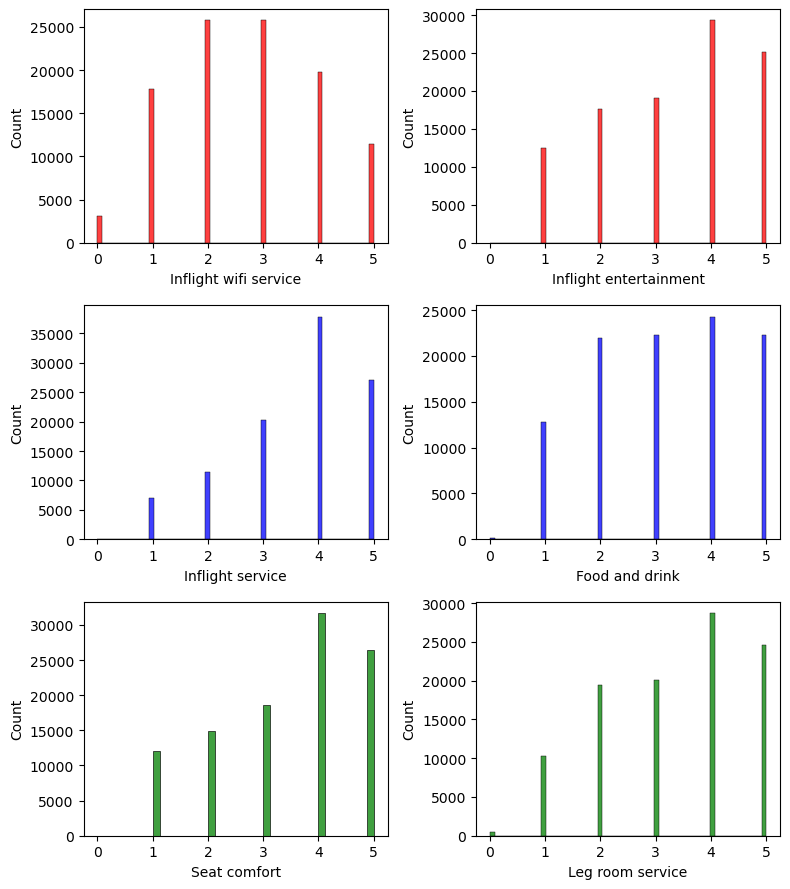

In [24]:
plt.rcParams['figure.figsize'] = [8,9]
plt.rcParams['figure.autolayout'] = True
f1, axes = plt.subplots(3,2)
histplot('Inflight wifi service', 'red', 0, 0)
histplot('Inflight entertainment', 'red', 0, 1)
histplot('Inflight service', 'blue', 1, 0)
histplot('Food and drink', 'blue', 1, 1)
histplot('Seat comfort', 'green', 2, 0)
histplot('Leg room service', 'green', 2, 1)

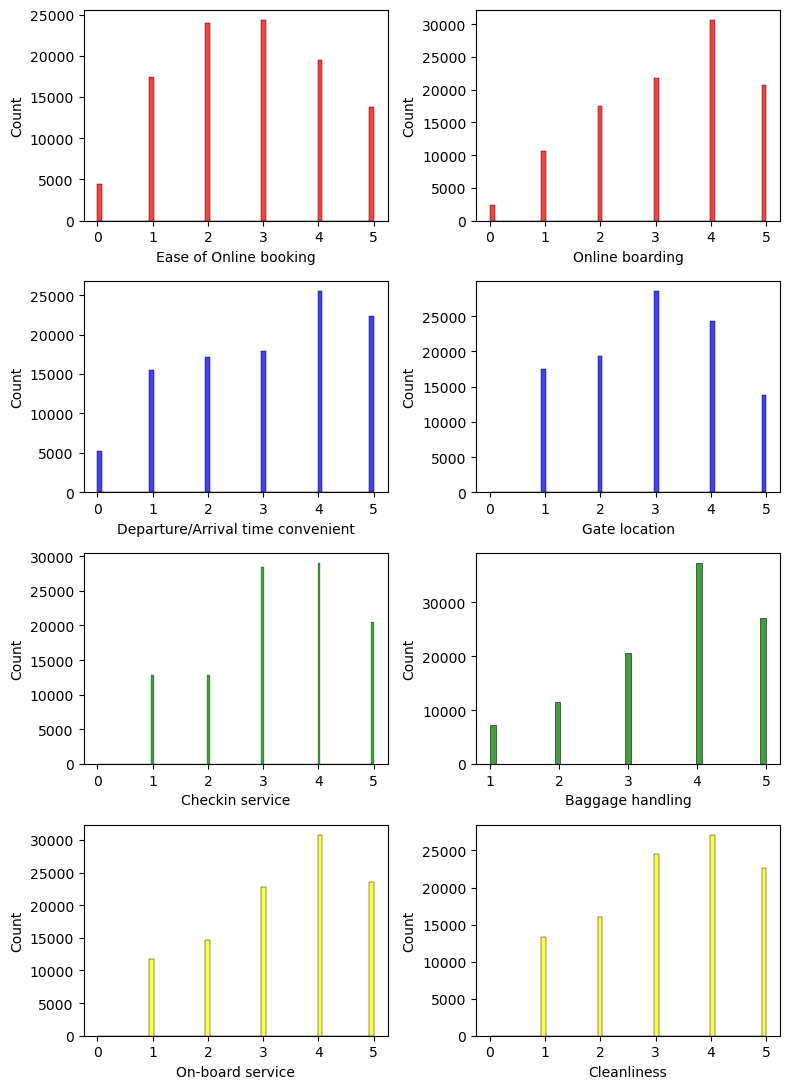

In [25]:
plt.rcParams['figure.figsize'] = [8,11]
plt.rcParams['figure.autolayout'] = True
f2, axes = plt.subplots(4,2)
histplot('Ease of Online booking', 'red', 0, 0)
histplot('Online boarding', 'red', 0, 1)
histplot('Departure/Arrival time convenient', 'blue', 1, 0)
histplot('Gate location', 'blue', 1, 1)
histplot('Checkin service', 'green', 2, 0)
histplot('Baggage handling', 'green', 2, 1)
histplot('On-board service', 'yellow', 3, 0)
histplot('Cleanliness', 'yellow', 3, 1)

### Bivariate Analysis

### Correlation Heatmap

In [26]:
#considering only numerical features for checking correlation
corr_aps = aps.drop(['id', 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Arrival Delay in Minutes', 'satisfaction'], axis = 1)
corr_aps

,Age,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,13,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25
1,25,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1
2,26,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0
3,25,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11
4,61,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3
103900,49,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0
103901,30,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7
103902,22,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0


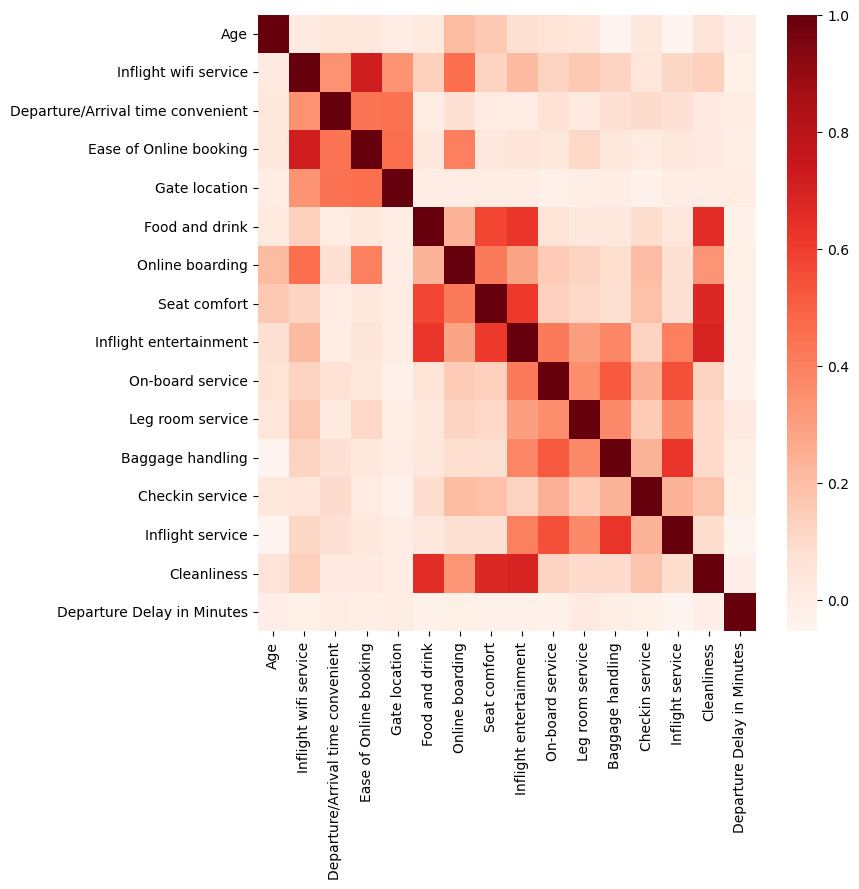

In [27]:
corr = corr_aps.corr()
plt.figure(figsize = [9,9])
sns.heatmap(corr, cmap ="Reds")
plt.show()

Observation: 
1. 'Cleanliness' is highly correlated with 'Food and Drink', 'Seat Comfort' and 'Inflight entartainment'
2. 'Ease of online booking' is highly correlated 'Inflight wifi service'

### CountPlots

In [28]:
def countplot(col_name, hue_col):
    plt.figure(figsize = (6,5))
    sns.countplot(data = aps, y = col_name, hue = hue_col)
    plt.show()

In [29]:
bins = [0, 18, 30, 50, 70, float('inf')]
labels = ['0-17', '18-29', '30-49', '50-69', '70+']
aps['age_group'] = pd.cut(aps['Age'], bins=bins, labels=labels, right=False)
aps['age_group'].value_counts()

age_group
30-49    44225
50-69    27366
18-29    22733
0-17      7901
70+       1369
Name: count, dtype: int64

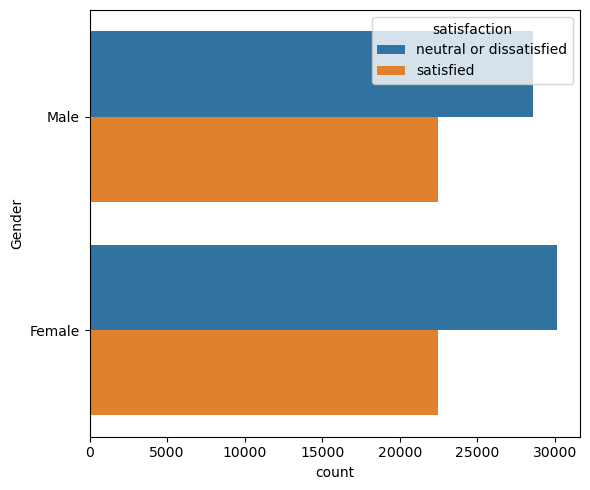

In [30]:
plt.figure(figsize = (6,5))
sns.countplot(data = aps, y='Gender', hue='satisfaction')
plt.show()

Observation: 
1. Amongst the both Gender more number of passengers are neutral/dissatisfied.
2. the neutral/dissatisfaction count is highest for Female's.

### Seperating the Dependant variable and Independant variables.
### Also dropping the columns that wont be required for prediction

In [31]:
aps.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'age_group'],
      dtype='object')

In [32]:
X = aps.drop(['id','satisfaction', 'age_group'], axis = 1)
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,2,3,1,4,2,3,2,3,0.0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,5,4,0,0.0
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,5,4,3,2,4,5,5,4,7,14.0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,1,4,5,1,5,4,1,0,0.0


In [33]:
X.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [34]:
y = aps['satisfaction']
y

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103594, dtype: object

## Generating dummy values

In [35]:
#generating dummy values for seperating multi classes into features
dum_X = pd.get_dummies(X, drop_first = True)
dum_X

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,4,5,5,25,18.0,True,False,True,False,True
1,25,235,3,2,3,3,1,3,1,1,...,1,4,1,1,6.0,True,True,False,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,5,0,0.0,False,False,False,False,False
3,25,562,2,5,5,5,2,2,2,2,...,1,4,2,11,9.0,False,False,False,False,False
4,61,214,3,3,3,3,4,5,5,3,...,3,3,3,0,0.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,...,2,3,2,3,0.0,False,True,False,True,False
103900,49,2347,4,4,4,4,2,4,5,5,...,5,5,4,0,0.0,True,False,False,False,False
103901,30,1995,1,1,1,3,4,1,5,4,...,5,5,4,7,14.0,True,True,False,False,False
103902,22,1000,1,1,1,5,1,1,1,1,...,5,4,1,0,0.0,False,True,False,True,False


In [36]:
dum_X.columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Eco', 'Class_Eco Plus'],
      dtype='object')

### Heatmap of X with dummies

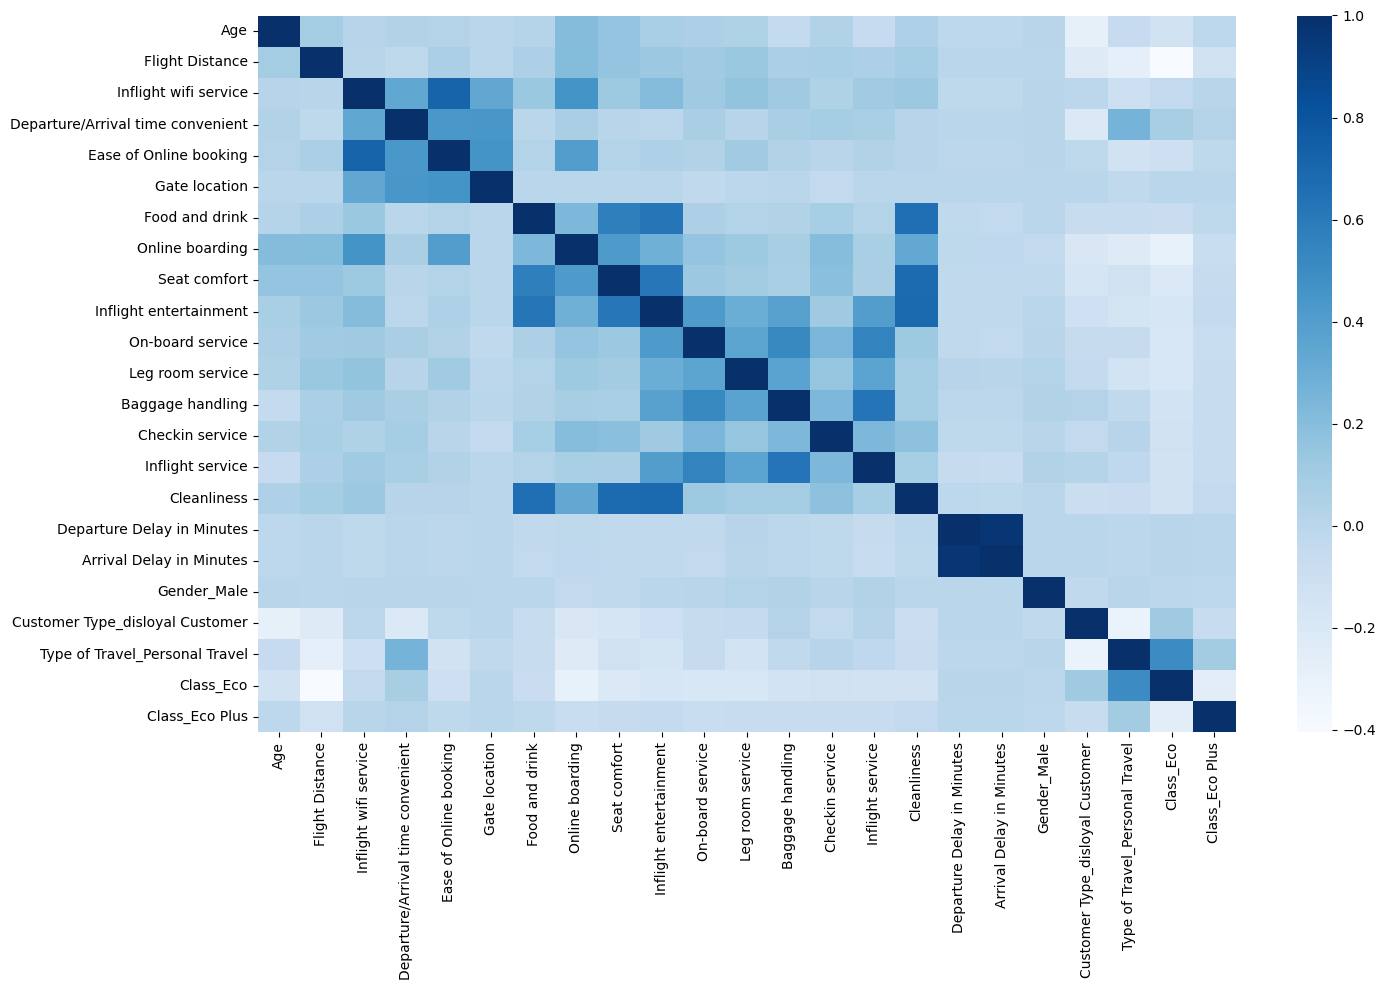

In [37]:
corr = dum_X.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, cmap = "Blues")
plt.show()

### Train, Test Split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(dum_X, y, test_size = 0.3, stratify = y, random_state = 23)

In [39]:
X_train

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
34333,24,585,5,5,5,4,5,5,5,5,...,3,5,5,61,64.0,True,True,False,False,False
95023,59,332,2,2,2,2,5,4,5,5,...,5,5,3,0,0.0,True,False,False,False,False
10326,35,337,2,5,2,3,4,2,1,4,...,3,5,4,5,9.0,True,False,True,True,False
71684,27,675,3,3,3,3,3,3,3,4,...,3,2,3,157,147.0,True,True,False,True,False
34847,34,456,2,3,3,3,2,2,2,2,...,3,4,2,1,0.0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68214,24,583,4,0,4,2,4,4,4,4,...,5,5,4,0,0.0,True,True,False,True,False
70076,48,1986,3,4,4,2,3,3,3,3,...,3,5,3,0,17.0,True,True,False,False,False
22519,37,3490,3,3,3,3,5,3,4,4,...,1,4,5,7,0.0,False,False,False,False,False
65106,57,612,2,4,4,4,2,2,2,2,...,3,1,2,30,36.0,True,False,False,True,False


In [40]:
X_test

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
55057,47,895,3,3,3,3,4,4,5,5,...,4,5,5,0,0.0,True,False,False,False,False
84953,39,931,4,5,5,4,4,5,4,4,...,5,4,4,0,0.0,True,False,True,True,False
62208,59,978,1,1,1,1,2,4,5,4,...,3,4,3,0,0.0,False,False,False,False,False
33784,38,3633,3,3,4,3,2,4,1,3,...,3,3,1,0,0.0,False,False,False,False,False
83359,52,310,2,5,4,2,2,4,2,2,...,3,4,2,0,0.0,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907,50,100,1,2,1,3,2,1,2,2,...,4,4,2,0,10.0,False,True,False,True,False
28031,37,347,5,3,3,3,5,5,5,5,...,5,5,5,0,0.0,False,False,False,True,False
15822,36,986,4,4,4,3,4,4,4,4,...,3,5,4,40,27.0,True,False,True,True,False
7715,38,861,1,4,5,4,1,1,1,1,...,2,3,1,7,0.0,True,False,False,False,True


In [41]:
y_train

34333                  satisfied
95023                  satisfied
10326    neutral or dissatisfied
71684    neutral or dissatisfied
34847    neutral or dissatisfied
                  ...           
68214                  satisfied
70076    neutral or dissatisfied
22519                  satisfied
65106                  satisfied
65218    neutral or dissatisfied
Name: satisfaction, Length: 72515, dtype: object

In [42]:
y_test

55057                   satisfied
84953     neutral or dissatisfied
62208                   satisfied
33784                   satisfied
83359     neutral or dissatisfied
                   ...           
1907      neutral or dissatisfied
28031                   satisfied
15822     neutral or dissatisfied
7715      neutral or dissatisfied
101198    neutral or dissatisfied
Name: satisfaction, Length: 31079, dtype: object

### Scaling the data to make it in a unified range

#### MinMax Scaler - as it would scale the data to a predefined range, making it less sensitive to outliers

In [46]:
mm_scaler = MinMaxScaler()

In [47]:
X_train_scaled = mm_scaler.fit_transform(X_train)
print(X_train_scaled)

[[0.21794872 0.11187399 1.         ... 0.         0.         0.        ]
 [0.66666667 0.06078352 0.4        ... 0.         0.         0.        ]
 [0.35897436 0.06179321 0.4        ... 1.         1.         0.        ]
 ...
 [0.38461538 0.69850565 0.6        ... 0.         0.         0.        ]
 [0.64102564 0.11732633 0.4        ... 0.         1.         0.        ]
 [0.64102564 0.09087237 0.6        ... 1.         0.         0.        ]]


In [48]:
X_test_scaled = mm_scaler.transform(X_test)
print(X_test_scaled)

[[0.51282051 0.17447496 0.6        ... 0.         0.         0.        ]
 [0.41025641 0.18174475 0.8        ... 1.         1.         0.        ]
 [0.66666667 0.19123586 0.2        ... 0.         0.         0.        ]
 ...
 [0.37179487 0.19285137 0.8        ... 1.         1.         0.        ]
 [0.3974359  0.16760905 0.2        ... 0.         0.         1.        ]
 [0.66666667 0.06179321 0.4        ... 1.         1.         0.        ]]


### Training and evaluating the models

In [54]:
accuracy_basic_model = {}

#defining a generic function to run basic classification models
def basic_model(model_name, x_tr, x_te, y_tr, y_te, str1):
    model = model_name()
    model.fit(x_tr, y_tr)
    y_pred = model.predict(x_te)
    acc = accuracy_score(y_te, y_pred)
    print(f"Accuracy Score For {str1}: {acc}")
    accuracy_basic_model[str1] = acc

### Implementing Logistic Regression

In [56]:
# Logistic Regression
basic_model(LogisticRegression, X_train_scaled, X_test_scaled, y_train, y_test, "Logistic Regression")

Accuracy Score For Logistic Regression: 0.8761543164194472


### Implementing K Nearest Neighbor

In [57]:
# KNN
basic_model(KNeighborsClassifier, X_train_scaled, X_test_scaled, y_train, y_test, "KNN")

Accuracy Score For KNN: 0.9263489816274655


### Implementing Naive Bayes

In [59]:
# Naive Bayes
basic_model(GaussianNB, X_train_scaled, X_test_scaled, y_train, y_test, "Naive Bayes")

Accuracy Score For Naive Bayes: 0.8619968467453908


### Implementing Decision Tree

In [60]:
# Decision Tree Classifier
basic_model(DecisionTreeClassifier, X_train_scaled, X_test_scaled, y_train, y_test, "Decision Tree")

Accuracy Score For Decision Tree: 0.9413108529875479


### Implementing Support Vector Machine

In [62]:
# Support Vector Machine
basic_model(SVC, X_train_scaled, X_test_scaled, y_train, y_test, "SVM")

Accuracy Score For SVM: 0.9478747707455195


### Implementing Random Forest 

In [65]:
# Random Forest Classifier
basic_model(RandomForestClassifier, X_train_scaled, X_test_scaled, y_train, y_test, "Random Forest")

Accuracy Score For Random Forest: 0.960391260980083


### Implementing Linear Discriminant Analysis

In [66]:
# Linear Discriminant Analysis (LDA)
basic_model(LinearDiscriminantAnalysis, X_train_scaled, X_test_scaled, y_train, y_test, "LDA")

Accuracy Score For LDA: 0.8747063933846005


### Implement Boosting

#### Implementing AdaBoost

In [68]:
# AdaBoost Classifier
basic_model(AdaBoostClassifier, X_train_scaled, X_test_scaled, y_train, y_test, "AdaBoost")

Accuracy Score For AdaBoost: 0.9274429679204608


### Comparing base models

In [72]:
# Displaying accuracy score of each base model
accuracy_basic_model

{'Logistic Regression': 0.8761543164194472,
 'KNN': 0.9263489816274655,
 'Naive Bayes': 0.8619968467453908,
 'Decision Tree': 0.9413108529875479,
 'SVM': 0.9478747707455195,
 'Random Forest': 0.960391260980083,
 'LDA': 0.8747063933846005,
 'AdaBoost': 0.9274429679204608}

In [73]:
# Creating DataFrame of all Scores
acc_df = pd.DataFrame(list(accuracy_basic_model.items()), columns = ['model', 'accuracy'])
acc_df

,model,accuracy
0,Logistic Regression,0.876154
1,KNN,0.926349
2,Naive Bayes,0.861997
3,Decision Tree,0.941311
4,SVM,0.947875
5,Random Forest,0.960391
6,LDA,0.874706
7,AdaBoost,0.927443


In [77]:
# Highlighting the best accuracy
acc_df.style.highlight_max(subset=['accuracy'], color='Orange', axis=0)

,model,accuracy
0,Logistic Regression,0.876154
1,KNN,0.926349
2,Naive Bayes,0.861997
3,Decision Tree,0.941311
4,SVM,0.947875
5,Random Forest,0.960391
6,LDA,0.874706
7,AdaBoost,0.927443


In [86]:
# sorting the dataframe in descending order of accuracy
acc_df.sort_values(by = ['accuracy'], inplace = True)
acc_df

,model,accuracy
2,Naive Bayes,0.861997
6,LDA,0.874706
0,Logistic Regression,0.876154
1,KNN,0.926349
7,AdaBoost,0.927443
3,Decision Tree,0.941311
4,SVM,0.947875
5,Random Forest,0.960391


### Accuracy Plot of base models

<Figure size 400x200 with 0 Axes>

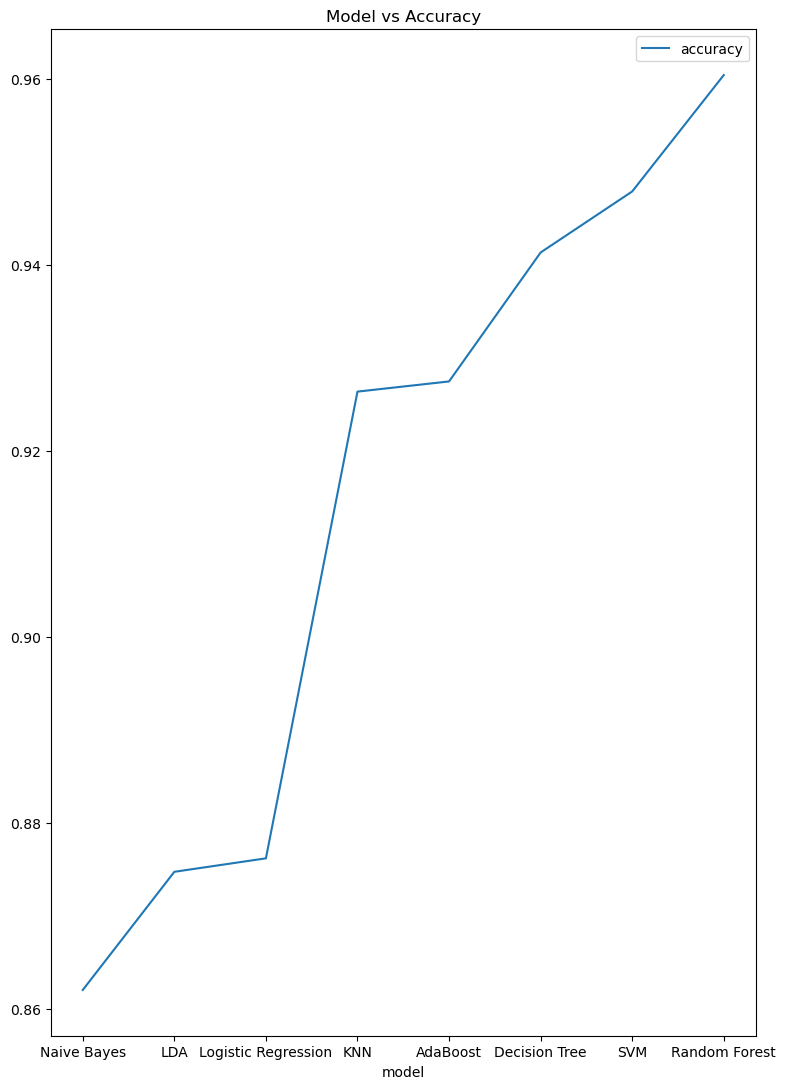

In [103]:
# plotting a graph of accuracy
plt.figure(figsize=(4, 2))  
acc_df.plot(x='model', y='accuracy', title='Model vs Accuracy')
plt.tight_layout()
plt.show()

### Fine-tuning the best model i.e. Random Forest

In [105]:
# training the model
rf = RandomForestClassifier(random_state=23)

In [106]:
# defining the folds using Stratified Kfold
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 23)

In [108]:
# all parameters of random forest
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 23,
 'verbose': 0,
 'warm_start': False}

In [115]:
# defining the parameters to be tuned
params = {
    'n_estimators': [5, 25, 50, 100],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 8, 11],
    'min_samples_leaf': [1, 2, 4, 8] 
}

In [116]:
# defining the grid
gcv = GridSearchCV(rf, param_grid = params, cv = kfold, scoring = 'accuracy', verbose = 3)

In [117]:
# fitting the model
gcv.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.877 total time=   0.1s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.869 total time=   0.1s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.878 total time=   0.1s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.870 total time=   0.1s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=5;, score=0.882 total time=   0.1s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.886 total time=   0.4s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.884 total time=   0.4s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=25;, score=0.887 total time=   0.4s
[CV 4/5] END 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=RandomForestClassifier(random_state=23),
             param_grid={'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 8, 11],
                         'n_estimators': [5, 25, 50, 100]},
             scoring='accuracy', verbose=3)

In [118]:
# best params and score for the tuned model
print("Best Params: ", gcv.best_params_)
print('Best Score: ', gcv.best_score_)

Best Params:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}
Best Score:  0.9436530373026271
